In [1]:
from ff_environment import TargetReach
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
env = TargetReach(space_padding=2)
env_info = env.reset()

In [3]:
# size of each action
action_size = env.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)

Size of each action: 2
The agent observes a state with length: 4
The starting state looks like: [0.5 1.  0.  0. ]


In [4]:
# Instantiate the agent:
agent = Agent(state_size, action_size, random_seed=2)

In [5]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 6000, print_every=250)

Episode 0 	Average Reward: -5.69
Episode 37 	Average Reward: -5.90

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 250 	Average Reward: -5.61
Episode 500 	Average Reward: -5.38
Episode 750 	Average Reward: -5.49
Episode 1000 	Average Reward: -5.81
Episode 1250 	Average Reward: -5.89
Episode 1500 	Average Reward: -5.92
Episode 1750 	Average Reward: -6.01
Episode 2000 	Average Reward: -6.02
Episode 2250 	Average Reward: -5.86
Episode 2500 	Average Reward: -5.86
Episode 2750 	Average Reward: -5.85
Episode 3000 	Average Reward: -5.87
Episode 3250 	Average Reward: -5.81
Episode 3500 	Average Reward: -5.80
Episode 3750 	Average Reward: -5.79
Episode 4000 	Average Reward: -5.74
Episode 4250 	Average Reward: -5.75
Episode 4500 	Average Reward: -5.69
Episode 4750 	Average Reward: -5.73
Episode 5000 	Average Reward: -5.71
Episode 5250 	Average Reward: -5.73
Episode 5500 	Average Reward: -5.68
Episode 5750 	Average Reward: -5.66
Episode 5999 	Average Reward: -5.65

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

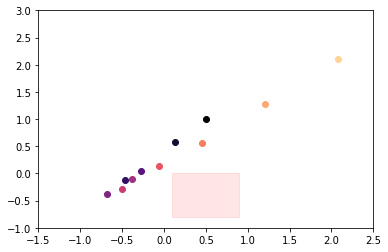

In [8]:
trajectories.plot(50, legend=False)

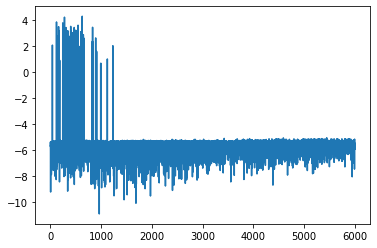

In [7]:
plt.plot(scores)